# Analisis de Datos: Sismos Distancia 50

In [1]:
import sys 
sys.path.append('..')

from framework import Framework
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/dataset50_entradas_10.csv')
df

,0,1,2,3,4,5,6,7,8,9,10
0,1008,1008,1109,308,1465,1188,701,618,1009,126,462
1,1008,1109,308,1465,1188,701,618,1009,126,462,158
2,1109,308,1465,1188,701,618,1009,126,462,158,962
3,308,1465,1188,701,618,1009,126,462,158,962,772
4,1465,1188,701,618,1009,126,462,158,962,772,1008
...,...,...,...,...,...,...,...,...,...,...,...
4879,276,350,739,922,1242,856,584,1008,1049,730,1008
4880,350,739,922,1242,856,584,1008,1049,730,1008,276
4881,739,922,1242,856,584,1008,1049,730,1008,276,1035
4882,922,1242,856,584,1008,1049,730,1008,276,1035,1035


In [3]:
fw = Framework(
    dataframe  = df,
    inputs     = ['{}'.format(i) for i in range(10)],
    target     = '10',
    save_dir   = "Modelos",
    test_size  = 0.15,
    random_state=0
)
hidden_layers = (10,1000,950,900,850,800,750,500,350,200,50)
max_iter = 150

#svm_model = "svm_distancia_50"
#mlp_model = "mlp_distancia_50"
sequential_model = "sequential_distancia_50_entradas_10_neuronas_1000"

#fw.load_svm_model(svm_model)
#fw.load_mlp_model(mlp_model)
fw.load_sequential_model(sequential_model)

In [4]:
#fw.get_svm_model()
print("SVM RMSE:",fw.get_svm_rmse())

SVM RMSE: Modelo sin inicializar


In [5]:
#fw.save_svm_model('svm_distancia_50')

In [6]:
#fw.get_mlp_model(hidden_layers=hidden_layers,max_iter=max_iter)
print("MLP RMSE:",fw.get_mlp_rmse())

MLP RMSE: Modelo sin inicializar


In [7]:
#fw.save_mlp_model('mlp_distancia_1000')

In [8]:
#fw.get_sequential_model(hidden_layers=hidden_layers, epochs=max_iter)
#print(fw.sequential_model_description)
print("Sequential RMSE:",fw.get_sequential_rmse())

Sequential RMSE: (328.8098694800772, 411.6612787748634)


In [9]:
#fw.save_sequential_model('sequential_distancia_50_entradas_30_neuronas_1000')

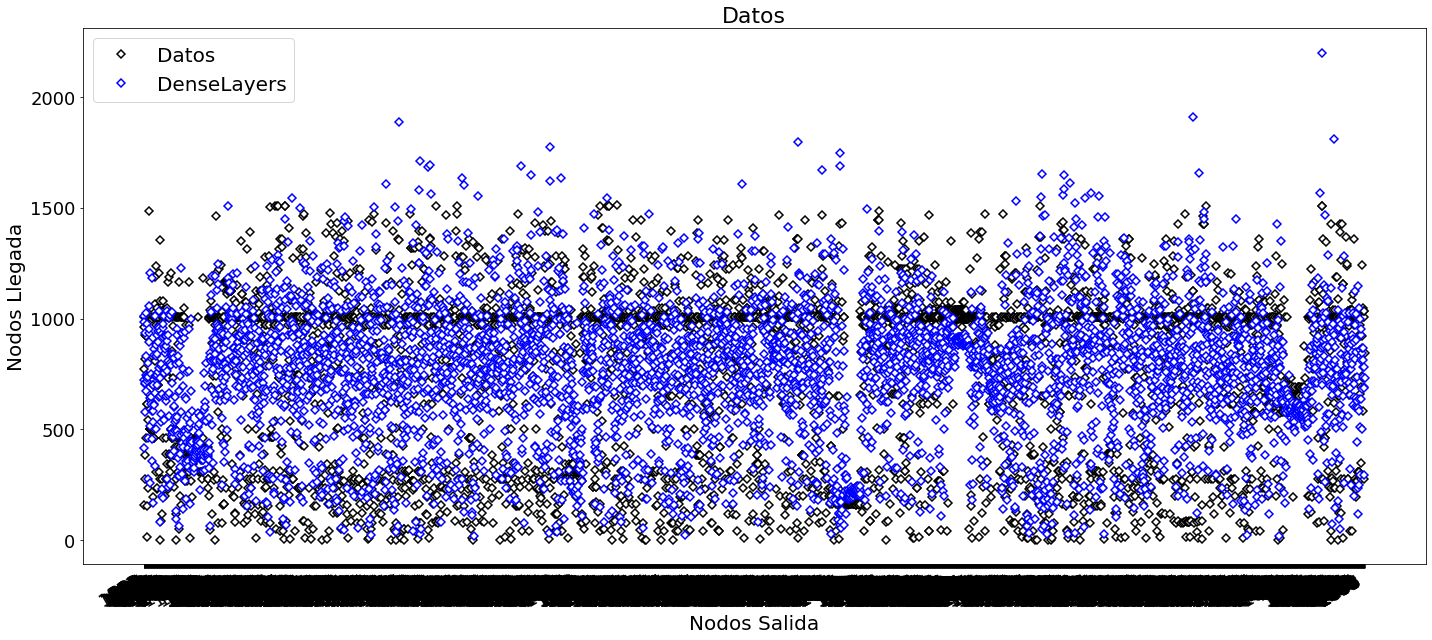

In [10]:
fw.plot_compare_nodes(
    'Graficas/modelos_distancia50_entradas_10_neuronas_1000.png',
    start_offset = 10,
    end_offset   = 4893,
    x_label="Nodos Salida",
    y_label="Nodos Llegada",
    figsize=(20,9),
    title_fontsize = 22,
    label_fontsize = 20,
    legend_fontsize = 20,
    ticks_fontsize = 18,
)

1514


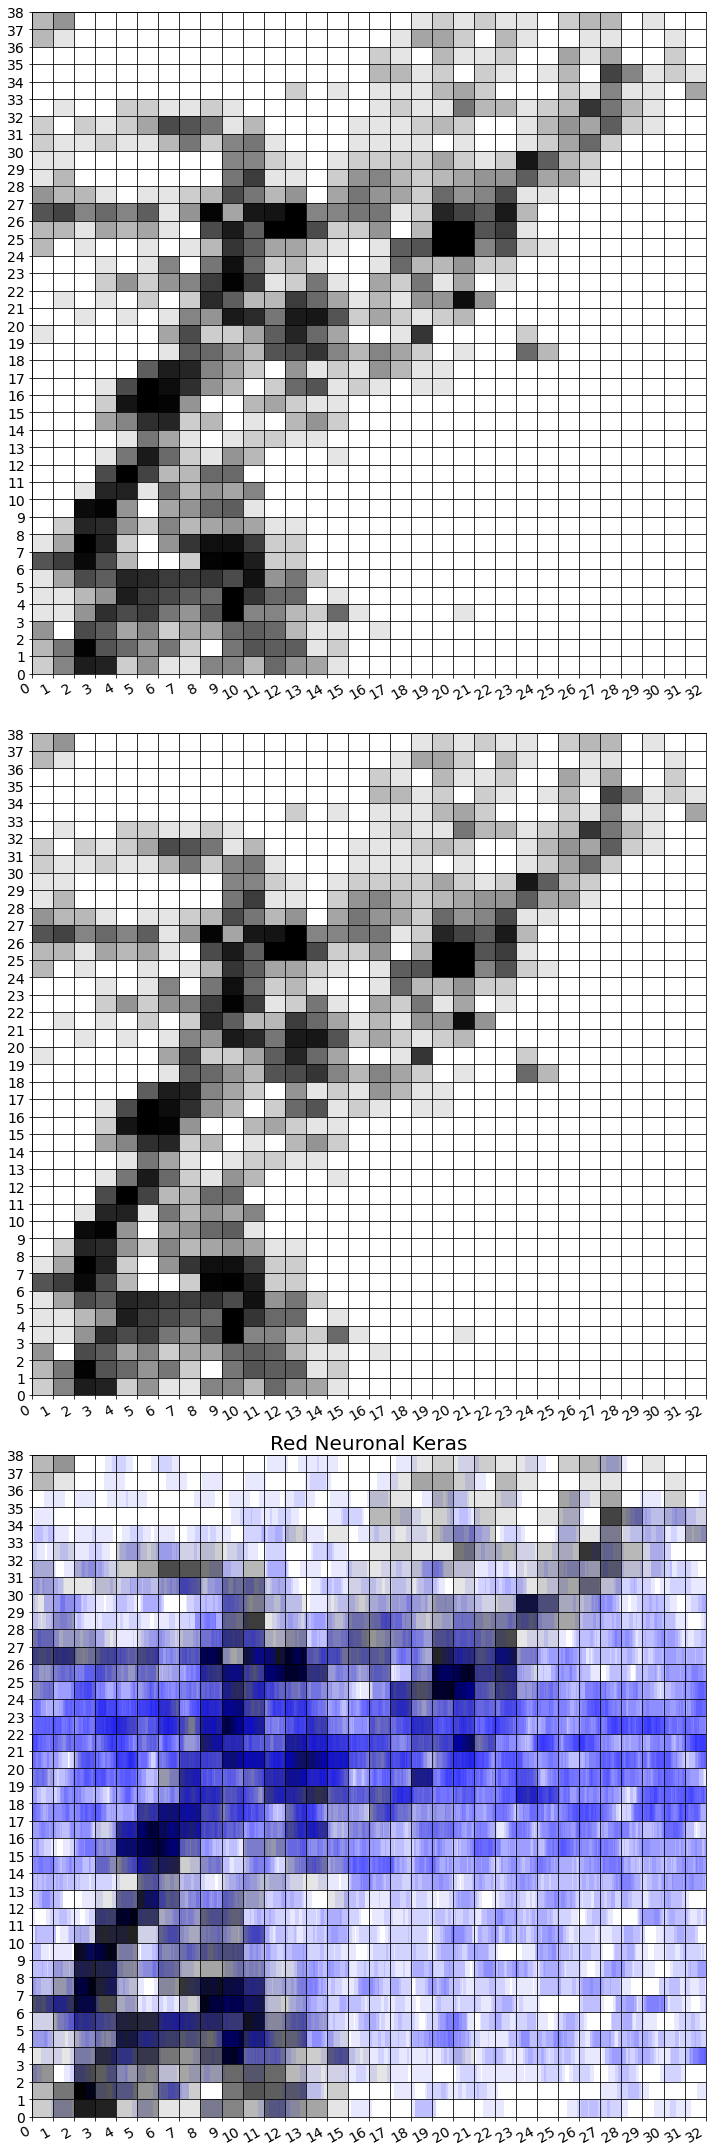

In [11]:
fw.plot_grid_nodes(
    50,
    'Graficas/grid_distancia50_entradas_10_neuronas_1000.png',
    figsize=(10,30),
    alphaData=0.1,
    alpha=0.09,
    dpi=240,
    linewidth=0.8
)

1514
(32.0, 38.0)


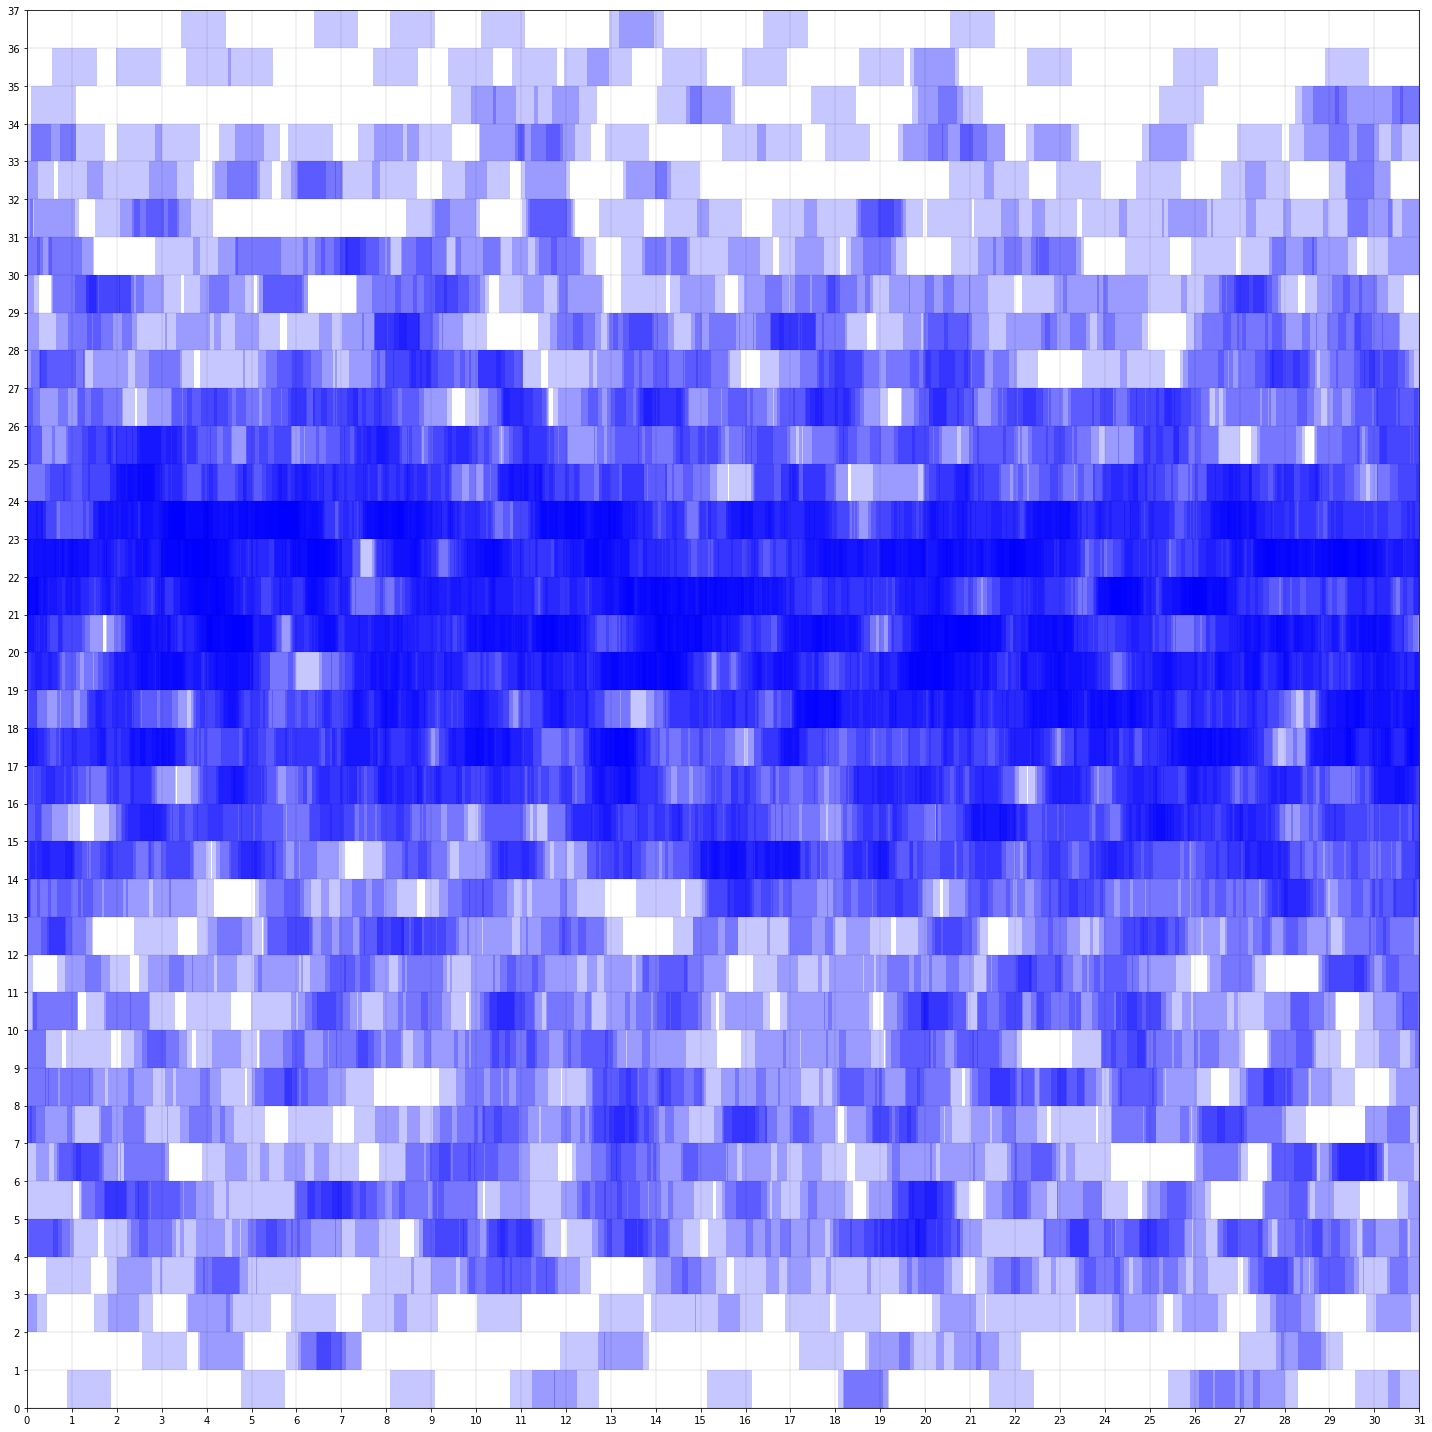

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from math import sqrt

fig, ax = plt.subplots(figsize=(20,20))
#ax.imshow(data, cmap=cmap, norm=norm)

min_val = min(fw.y_values)
max_val = max(fw.y_values)
print(max_val)
#print(sqrt(max_val))
div = 1900/50
        
vals_xy = (max_val%div,div)

print(vals_xy)
for i in range(3):
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.1)
    ax.set_xticks(np.arange(0,vals_xy[0], 1));
    ax.set_yticks(np.arange(0,vals_xy[1], 1));
    for value in fw.get_sequential_predictions():
        nx = int(value/div)-1
        ny = (value%div)-1
        xy = (ny,nx)
        #print(xy)
        rectangle = Rectangle(xy, 1, 1,alpha=0.08, facecolor='b')
        ax.add_patch(rectangle)
        #ax.text(xy[0],xy[1],str(value), fontsize=3)
        
plt.tight_layout()
plt.show()

In [13]:
# fig.savefig('Graficas/gris.png', dpi=240)